In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split

In [ ]:
data = fashion_mnist.load_data()

In [ ]:
len(data)

2

In [ ]:
(X_train, y_train), (X_test, y_test) = data

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


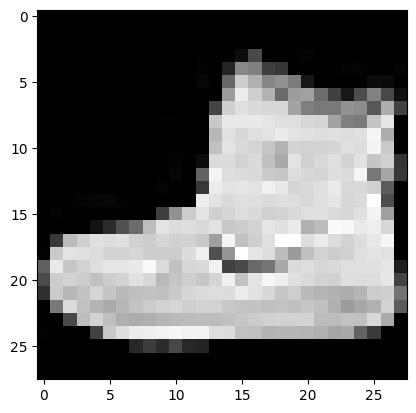

In [ ]:
plt.imshow(X_train[0], cmap='gray')

In [ ]:
# X_train = X_train.reshape(60000, -1)
# X_test = X_test.reshape(10000, -1)

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))

model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 512)               401920    
                                                                 
 dense_32 (Dense)            (None, 256)               131328    
                                                                 
 dense_33 (Dense)            (None, 128)               32896     
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 dense_35 (Dense)            (None, 32)                2080      
                                                                 
 dense_36 (Dense)            (None, 10)               

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

In [ ]:
h = model.fit(X_train, y_train_onehot, batch_size=128, epochs=5, validation_data=(X_test, y_test_onehot))

Epoch 1/5
469/469 [==============================] - 11s 12ms/step - loss: 1.4387 - acc: 0.4272 - val_loss: 1.0772 - val_acc: 0.5233
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.9529 - acc: 0.6319 - val_loss: 0.8894 - val_acc: 0.6447
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.8645 - acc: 0.6687 - val_loss: 0.8226 - val_acc: 0.7024
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.7797 - acc: 0.7045 - val_loss: 0.7949 - val_acc: 0.6999
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.7616 - acc: 0.7089 - val_loss: 0.8051 - val_acc: 0.6813


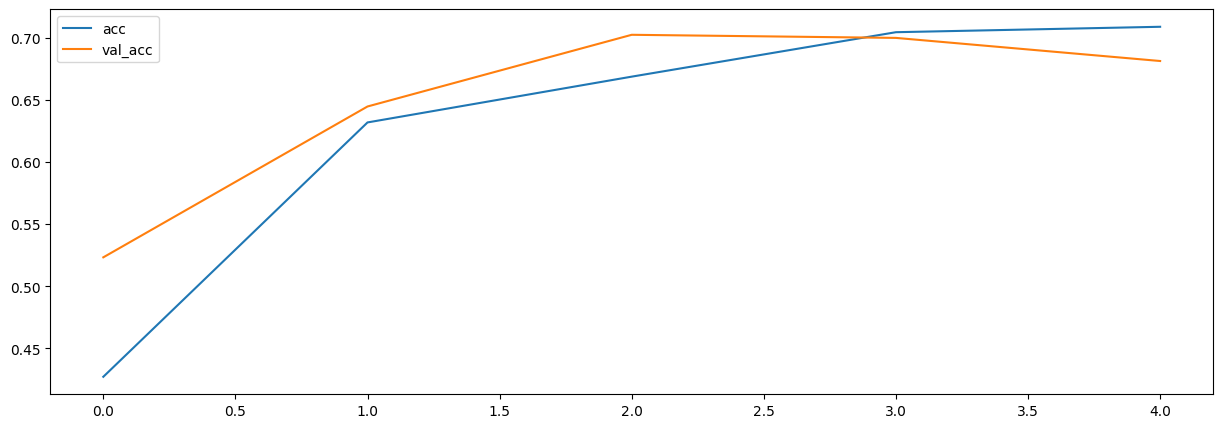

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(h.history['acc'], label='acc')
plt.plot(h.history['val_acc'], label='val_acc')

plt.legend()
plt.show()